In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\Ml_prs\datasets\Wine.csv")    
print(df.head())
print(df.info())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [34]:
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']


In [36]:
#Standardize the Data Important step — PCA works best when all features are on the same scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
#apply pca Reduce 13 features → 2 components while keeping most of the information.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [19]:
#Reduce Dataset to 2 Components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

print("Original Shape:", X_scaled.shape)
print("Reduced Shape:", X_reduced.shape)


Original Shape: (178, 13)
Reduced Shape: (178, 2)


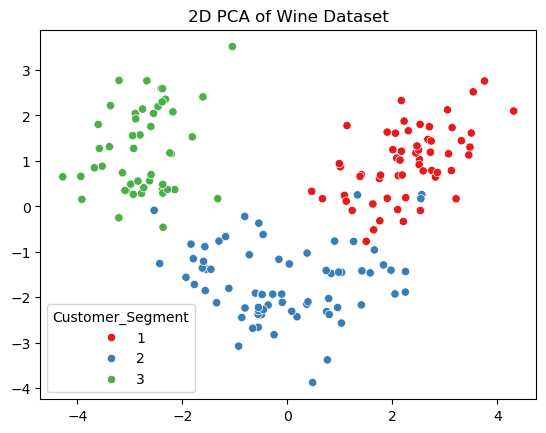

In [40]:
#See how the 3 classes form clear clusters in 2D.
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title("2D PCA of Wine Dataset")
plt.show()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy before PCA:", accuracy_score(y_test, model.predict(X_test)))

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)
model.fit(X_train_pca, y_train)
print("Accuracy after PCA:", accuracy_score(y_test, model.predict(X_test_pca)))


Accuracy before PCA: 1.0
Accuracy after PCA: 0.9722222222222222
